In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import scipy.stats as stat
import scipy as sp
import statistics

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
#!pip install tqdm
# temps d'execution cellule

In [3]:
#!pip install nb_black
# formateur de code automatique

In [4]:
#shift + tab pour avoir la doc module

# Data read

In [5]:
df = pd.read_csv("Result_final_1.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743257 entries, 0 to 1743256
Data columns (total 24 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Unnamed: 0                         int64 
 1   MandatId                           int64 
 2   DateCreation                       object
 3   BienMandatId                       int64 
 4   Statut                             int64 
 5   DescriptionBien_DateOffreAcceptee  object
 6   Origine_DateCollecte               object
 7   CritereId                          int64 
 8   SurfaceMin                         int64 
 9   NombrePiecesEnum                   int64 
 10  NombreChambresEnum                 int64 
 11  Departement_LocalisationId         int64 
 12  Region_LocalisationId              int64 
 13  LocalisationId                     int64 
 14  StatutMandat                       int64 
 15  TypeMission                        int64 
 16  TypeBien                           i

In [7]:
df.head()

,Unnamed: 0,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
1,1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
2,2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
3,3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
4,4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0


In [8]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [9]:
print("Nombre de lignes dupliquées", df.duplicated().sum())

Nombre de lignes dupliquées 0


In [10]:
df.isnull().sum()

MandatId                             0
DateCreation                         0
BienMandatId                         0
Statut                               0
DescriptionBien_DateOffreAcceptee    0
Origine_DateCollecte                 0
CritereId                            0
SurfaceMin                           0
NombrePiecesEnum                     0
NombreChambresEnum                   0
Departement_LocalisationId           0
Region_LocalisationId                0
LocalisationId                       0
StatutMandat                         0
TypeMission                          0
TypeBien                             0
TypeProjet                           0
BudgetMaxEuro                        0
CodePostal                           0
Ville                                0
Departement                          0
Region                               0
Succes                               0
dtype: int64

# Data Analyse

In [11]:
df.TypeProjet.value_counts()

1    1320890
0     323967
2      98400
Name: TypeProjet, dtype: int64

1= Résidence principale    1320890
0= Investissement           323967
2= Résidence secondaire      98400

In [12]:
df["TypeMission"].value_counts()

2    1623396
1      87236
0      22879
4       5345
6       2257
5       1306
3        838
Name: TypeMission, dtype: int64

In [13]:
df["Succes"].value_counts()

0    1091942
1     651315
Name: Succes, dtype: int64

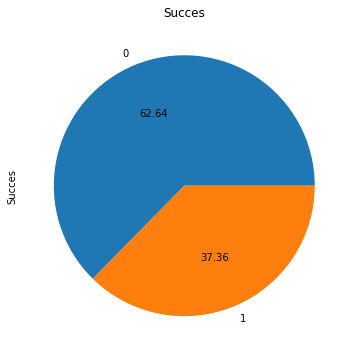

In [14]:
plot = df['Succes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Succes')

In [15]:
df.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,30,2,1,121,27,129,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0


In [16]:
df.columns

Index(['MandatId', 'DateCreation', 'BienMandatId', 'Statut',
       'DescriptionBien_DateOffreAcceptee', 'Origine_DateCollecte',
       'CritereId', 'SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum',
       'Departement_LocalisationId', 'Region_LocalisationId', 'LocalisationId',
       'StatutMandat', 'TypeMission', 'TypeBien', 'TypeProjet',
       'BudgetMaxEuro', 'CodePostal', 'Ville', 'Departement', 'Region',
       'Succes'],
      dtype='object')

In [17]:
df.dtypes.value_counts()

int64     17
object     6
dtype: int64

In [18]:
df.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

MandatId                        7579
BienMandatId                  395103
Statut                             8
CritereId                       7579
SurfaceMin                       117
NombrePiecesEnum                   7
NombreChambresEnum                 7
Departement_LocalisationId        84
Region_LocalisationId             22
LocalisationId                  3248
StatutMandat                       3
TypeMission                        7
TypeBien                           9
TypeProjet                         3
BudgetMaxEuro                    365
CodePostal                      1826
Succes                             2
dtype: int64

In [19]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

DateCreation                         2276
DescriptionBien_DateOffreAcceptee    1110
Origine_DateCollecte                 3064
Ville                                3154
Departement                            84
Region                                 22
dtype: int64

# Division du jeu de données pour le reduire

# Utilisation de iloc pour diviser dataset en deux

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743257 entries, 0 to 1743256
Data columns (total 23 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   MandatId                           int64 
 1   DateCreation                       object
 2   BienMandatId                       int64 
 3   Statut                             int64 
 4   DescriptionBien_DateOffreAcceptee  object
 5   Origine_DateCollecte               object
 6   CritereId                          int64 
 7   SurfaceMin                         int64 
 8   NombrePiecesEnum                   int64 
 9   NombreChambresEnum                 int64 
 10  Departement_LocalisationId         int64 
 11  Region_LocalisationId              int64 
 12  LocalisationId                     int64 
 13  StatutMandat                       int64 
 14  TypeMission                        int64 
 15  TypeBien                           int64 
 16  TypeProjet                         i

In [21]:
25*1743257/100

435814.25

In [22]:
df_25 = df.iloc[:435816,:]

In [23]:
df_25.tail()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
435811,44429,2018-06-25,138614,7,0001-01-01,0001-01-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435812,44429,2018-06-25,138615,0,0001-01-01,2018-07-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435813,44429,2018-06-25,138616,7,0001-01-01,0001-01-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435814,44429,2018-06-25,138617,0,0001-01-01,2018-06-29,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435815,44429,2018-06-25,138618,7,0001-01-01,0001-01-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1


In [24]:
df_75 = df.iloc[435816:,:]

In [25]:
df_75.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
435816,44429,2018-06-25,138721,0,0001-01-01,2018-07-05,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435817,44429,2018-06-25,138876,7,0001-01-01,0001-01-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435818,44429,2018-06-25,138883,7,0001-01-01,0001-01-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435819,44429,2018-06-25,139117,0,0001-01-01,0001-01-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435820,44429,2018-06-25,139119,0,0001-01-01,0001-01-01,44508,45,3,2,81,16,14712,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1


In [26]:
df_11 = df_25.loc[df_25["Succes"]==1]

In [27]:
df_22 = df_25.loc[df_25["Succes"]==0]

In [28]:
df_11["Succes"].value_counts()

1    118280
Name: Succes, dtype: int64

In [29]:
df_22["Succes"].value_counts()

0    317536
Name: Succes, dtype: int64

In [30]:
118280 - 317536

-199256

In [31]:
df_22.drop(df_22.index[:199256], inplace=True)

C:\Users\LOUDOU~1\AppData\Local\Temp/ipykernel_36400/2324178546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22.drop(df_22.index[:199256], inplace=True)


In [32]:
df_22["Succes"].value_counts()

0    118280
Name: Succes, dtype: int64

In [33]:
df_33 = pd.concat([df_11, df_22],ignore_index = True)

In [34]:
df_33["Succes"].value_counts()

1    118280
0    118280
Name: Succes, dtype: int64

In [35]:
df_33.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,Departement_LocalisationId,Region_LocalisationId,LocalisationId,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,80309,2021-03-23,399964,4,0001-01-01,0001-01-01,81128,30,2,1,121,27,129,8,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
1,80309,2021-03-23,399990,0,0001-01-01,2021-03-31,81128,30,2,1,121,27,129,8,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
2,80309,2021-03-23,399992,0,0001-01-01,2021-03-31,81128,30,2,1,121,27,129,8,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
3,80309,2021-03-23,399993,0,0001-01-01,2021-03-31,81128,30,2,1,121,27,129,8,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
4,80309,2021-03-23,400289,0,0001-01-01,0001-01-01,81128,30,2,1,121,27,129,8,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1


# Préparation des données

In [36]:
df_33.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236560 entries, 0 to 236559
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   MandatId                           236560 non-null  int64 
 1   DateCreation                       236560 non-null  object
 2   BienMandatId                       236560 non-null  int64 
 3   Statut                             236560 non-null  int64 
 4   DescriptionBien_DateOffreAcceptee  236560 non-null  object
 5   Origine_DateCollecte               236560 non-null  object
 6   CritereId                          236560 non-null  int64 
 7   SurfaceMin                         236560 non-null  int64 
 8   NombrePiecesEnum                   236560 non-null  int64 
 9   NombreChambresEnum                 236560 non-null  int64 
 10  Departement_LocalisationId         236560 non-null  int64 
 11  Region_LocalisationId              236560 non-null  

In [37]:
df_33.drop(["MandatId", "BienMandatId","CritereId","Statut","StatutMandat","DateCreation", "DescriptionBien_DateOffreAcceptee","Origine_DateCollecte", "Departement_LocalisationId", "Region_LocalisationId", "LocalisationId"], axis = 1, inplace = True)

In [38]:
df_33.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

SurfaceMin             66
NombrePiecesEnum        7
NombreChambresEnum      7
TypeMission             6
TypeBien                9
TypeProjet              3
BudgetMaxEuro         154
CodePostal            359
Succes                  2
dtype: int64

In [39]:
df_33.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Ville          671
Departement     23
Region          15
dtype: int64

In [40]:
df_33.select_dtypes('float').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [41]:
df_33.head(2)

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,30,2,1,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
1,30,2,1,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1


# Machine Learning

# Pre-processing

## Encodage ==> Get_dummies

In [42]:
df_test = pd.get_dummies(df_33,columns = ['Region','Departement'], drop_first=True)
#df = pd.concat([df_test.drop(['Region', 'Ville',"Departement"],axis=1), dummies],axis=1)

In [43]:
df_test.head()

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Succes,Region_Auvergne,Region_Bourgogne,Region_Bretagne,Region_Centre,Region_Champagne-Ardenne,Region_Corse,Region_Franche-Comté,Region_Haute-Normandie,Region_Languedoc-Roussillon,Region_Midi-Pyrénées,Region_Picardie,Region_Poitou-Charentes,Region_Provence-Alpes-Côte d'Azur,Region_Rhône-Alpes,Departement_Aisne,Departement_Allier,Departement_Alpes-Maritimes,Departement_Ardèche,Departement_Aube,Departement_Aude,Departement_Bouches-du-Rhône,Departement_Charente,Departement_Charente-Maritime,Departement_Corse-du-Sud,Departement_Côte-d'Or,Departement_Côtes-d'Armor,Departement_Doubs,Departement_Drôme,Departement_Eure,Departement_Eure-et-Loir,Departement_Finistère,Departement_Gard,Departement_Gers,Departement_Gironde,Departement_Haute-Garonne,Departement_Hérault
0,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
df_test.isnull().sum()

SurfaceMin                           0
NombrePiecesEnum                     0
NombreChambresEnum                   0
TypeMission                          0
TypeBien                             0
TypeProjet                           0
BudgetMaxEuro                        0
CodePostal                           0
Ville                                0
Succes                               0
Region_Auvergne                      0
Region_Bourgogne                     0
Region_Bretagne                      0
Region_Centre                        0
Region_Champagne-Ardenne             0
Region_Corse                         0
Region_Franche-Comté                 0
Region_Haute-Normandie               0
Region_Languedoc-Roussillon          0
Region_Midi-Pyrénées                 0
Region_Picardie                      0
Region_Poitou-Charentes              0
Region_Provence-Alpes-Côte d'Azur    0
Region_Rhône-Alpes                   0
Departement_Aisne                    0
Departement_Allier       

In [45]:
df_test.head(2)

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Succes,Region_Auvergne,Region_Bourgogne,Region_Bretagne,Region_Centre,Region_Champagne-Ardenne,Region_Corse,Region_Franche-Comté,Region_Haute-Normandie,Region_Languedoc-Roussillon,Region_Midi-Pyrénées,Region_Picardie,Region_Poitou-Charentes,Region_Provence-Alpes-Côte d'Azur,Region_Rhône-Alpes,Departement_Aisne,Departement_Allier,Departement_Alpes-Maritimes,Departement_Ardèche,Departement_Aube,Departement_Aude,Departement_Bouches-du-Rhône,Departement_Charente,Departement_Charente-Maritime,Departement_Corse-du-Sud,Departement_Côte-d'Or,Departement_Côtes-d'Armor,Departement_Doubs,Departement_Drôme,Departement_Eure,Departement_Eure-et-Loir,Departement_Finistère,Departement_Gard,Departement_Gers,Departement_Gironde,Departement_Haute-Garonne,Departement_Hérault
0,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236560 entries, 0 to 236559
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   SurfaceMin                         236560 non-null  int64 
 1   NombrePiecesEnum                   236560 non-null  int64 
 2   NombreChambresEnum                 236560 non-null  int64 
 3   TypeMission                        236560 non-null  int64 
 4   TypeBien                           236560 non-null  int64 
 5   TypeProjet                         236560 non-null  int64 
 6   BudgetMaxEuro                      236560 non-null  int64 
 7   CodePostal                         236560 non-null  int64 
 8   Ville                              236560 non-null  object
 9   Succes                             236560 non-null  int64 
 10  Region_Auvergne                    236560 non-null  uint8 
 11  Region_Bourgogne                   236560 non-null  

# Choix des features

In [47]:
df_test.columns

Index(['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal', 'Ville',
       'Succes', 'Region_Auvergne', 'Region_Bourgogne', 'Region_Bretagne',
       'Region_Centre', 'Region_Champagne-Ardenne', 'Region_Corse',
       'Region_Franche-Comté', 'Region_Haute-Normandie',
       'Region_Languedoc-Roussillon', 'Region_Midi-Pyrénées',
       'Region_Picardie', 'Region_Poitou-Charentes',
       'Region_Provence-Alpes-Côte d'Azur', 'Region_Rhône-Alpes',
       'Departement_Aisne', 'Departement_Allier',
       'Departement_Alpes-Maritimes', 'Departement_Ardèche',
       'Departement_Aube', 'Departement_Aude', 'Departement_Bouches-du-Rhône',
       'Departement_Charente', 'Departement_Charente-Maritime',
       'Departement_Corse-du-Sud', 'Departement_Côte-d'Or',
       'Departement_Côtes-d'Armor', 'Departement_Doubs', 'Departement_Drôme',
       'Departement_Eure', 'Departement_Eure-et-Loir', 'Departement_Finistèr

In [48]:
X =df_test.drop(["Succes","Ville"], axis = 1)

In [49]:
X.columns

Index(['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal',
       'Region_Auvergne', 'Region_Bourgogne', 'Region_Bretagne',
       'Region_Centre', 'Region_Champagne-Ardenne', 'Region_Corse',
       'Region_Franche-Comté', 'Region_Haute-Normandie',
       'Region_Languedoc-Roussillon', 'Region_Midi-Pyrénées',
       'Region_Picardie', 'Region_Poitou-Charentes',
       'Region_Provence-Alpes-Côte d'Azur', 'Region_Rhône-Alpes',
       'Departement_Aisne', 'Departement_Allier',
       'Departement_Alpes-Maritimes', 'Departement_Ardèche',
       'Departement_Aube', 'Departement_Aude', 'Departement_Bouches-du-Rhône',
       'Departement_Charente', 'Departement_Charente-Maritime',
       'Departement_Corse-du-Sud', 'Departement_Côte-d'Or',
       'Departement_Côtes-d'Armor', 'Departement_Doubs', 'Departement_Drôme',
       'Departement_Eure', 'Departement_Eure-et-Loir', 'Departement_Finistère',
       'Departe

In [50]:
X.head()

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Region_Auvergne,Region_Bourgogne,Region_Bretagne,Region_Centre,Region_Champagne-Ardenne,Region_Corse,Region_Franche-Comté,Region_Haute-Normandie,Region_Languedoc-Roussillon,Region_Midi-Pyrénées,Region_Picardie,Region_Poitou-Charentes,Region_Provence-Alpes-Côte d'Azur,Region_Rhône-Alpes,Departement_Aisne,Departement_Allier,Departement_Alpes-Maritimes,Departement_Ardèche,Departement_Aube,Departement_Aude,Departement_Bouches-du-Rhône,Departement_Charente,Departement_Charente-Maritime,Departement_Corse-du-Sud,Departement_Côte-d'Or,Departement_Côtes-d'Armor,Departement_Doubs,Departement_Drôme,Departement_Eure,Departement_Eure-et-Loir,Departement_Finistère,Departement_Gard,Departement_Gers,Departement_Gironde,Departement_Haute-Garonne,Departement_Hérault
0,30,2,1,2,2,1,100000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,2,1,2,2,1,100000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,30,2,1,2,2,1,100000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,2,1,2,2,1,100000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,2,1,2,2,1,100000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
X.iloc[:1,]

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Region_Auvergne,Region_Bourgogne,Region_Bretagne,Region_Centre,Region_Champagne-Ardenne,Region_Corse,Region_Franche-Comté,Region_Haute-Normandie,Region_Languedoc-Roussillon,Region_Midi-Pyrénées,Region_Picardie,Region_Poitou-Charentes,Region_Provence-Alpes-Côte d'Azur,Region_Rhône-Alpes,Departement_Aisne,Departement_Allier,Departement_Alpes-Maritimes,Departement_Ardèche,Departement_Aube,Departement_Aude,Departement_Bouches-du-Rhône,Departement_Charente,Departement_Charente-Maritime,Departement_Corse-du-Sud,Departement_Côte-d'Or,Departement_Côtes-d'Armor,Departement_Doubs,Departement_Drôme,Departement_Eure,Departement_Eure-et-Loir,Departement_Finistère,Departement_Gard,Departement_Gers,Departement_Gironde,Departement_Haute-Garonne,Departement_Hérault
0,30,2,1,2,2,1,100000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
y = df_test['Succes']

y.shape

In [53]:
X =df_33.drop(["Succes", "Ville", "Departement", "Region"], axis = 1)

In [54]:
y = df_33['Succes']

# Diviser le jeu de données en jeu d'entrainement et jeu de test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
X_train.columns

Index(['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal'],
      dtype='object')

## Normalisation

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creation d'un pipeline fit, dump, load

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

In [59]:
pipe = make_pipeline(scaler, LogisticRegression(solver='newton-cg', C =0.001, penalty = 'l2'))
pipe.fit(X_train, y_train)
joblib.dump(pipe, 'LogisticRegression_solver_newton-cg_C_0.001_penalty_l2.pkl')

['LogisticRegression_solver_newton-cg_C_0.001_penalty_l2.pkl']

In [60]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
colonnes = ['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
           'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal']
X_new = pd.DataFrame(data = [[70, 3, 1, 1, 2, 1, 250000, 31000]], columns = colonnes )

In [ ]:
# load modele
pipe = joblib.load('LogisticRegression_solver_newton-cg_C_0.001_penalty_l2.pkl')

# declaration des nouvelles donnnées
colonnes = ['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
           'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal']
X_new = pd.DataFrame(data = [[70, 3, 1, 1, 2, 1, 250000, 31000]], columns = colonnes )
pred_cols = list(X_new.columns.values)

# apply the pipeline to data
pred = pd.Series(pipe.predict(X_new[pred_cols]))
print (pred)

# Creation de d'un pipeline preprocessor

In [ ]:
X =df_33.drop(["Succes"], axis = 1)

In [ ]:
X.columns

In [ ]:
y = df_33['Succes']

In [ ]:
"Ville", "Departement", "Region"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#numerical_features = X.select_dtypes('int').apply(pd.Series.nunique, axis = 0)
#print(numerical_features)

In [ ]:
#categorical_features = X.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#print(categorical_features)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Binarizer
from sklearn.linear_model import LogisticRegression

In [ ]:
numerical_features = make_column_selector(dtype_include=np.number)

In [ ]:
numerical_pipeline = make_pipeline(StandardScaler())

In [ ]:
categorical_features = make_column_selector(dtype_exclude=np.number)

In [ ]:
categorical_pipeline = make_pipeline(OneHotEncoder())

In [ ]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), (categorical_pipeline, categorical_features))

In [ ]:
model = make_pipeline(preprocessor, LogisticRegression(solver='newton-cg', C =0.001, penalty = 'l2'))

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_lr_pip = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr_pip,target_names = ['Echec(Class 0)','Succès (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LR')
plt.show()

# Test stokage du preprocessing des donnnées en vue d'utilisation pour tester modèle avec new data

In [ ]:
#faire OneHotEncoding sur les objets

In [ ]:
#faire standar scaler sur les int 

In [ ]:
#enregister la procedure

In [ ]:
X =df_33.drop(["Succes"], axis = 1)

In [ ]:
y = df_33["Succes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Z = df_33[['Ville', 'Region', "Departement"]]
enc.fit_transform(Z)

In [ ]:
Z.shape

In [ ]:
import pickle
with open('encoder.pickle', 'wb') as f:
    pickle.dump(enc, f)

In [ ]:
with open('encoder.pickle', 'rb') as f:
    enc = pickle.load(f)

In [ ]:
X_train.columns

In [ ]:
colonnes = ['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal', 'Ville',
       'Departement', 'Region']
X_new = pd.DataFrame(data =[[70, 3, 1, 1, 2, 1, 250000, 31000, "Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonnes )

In [ ]:
X_new.head()

In [ ]:
colonne = ['Ville','Departement', 'Region']
X_new = pd.DataFrame(data=[["Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonne)

In [ ]:
X_new.head()

In [ ]:
enc.transform(X_new)

In [ ]:
exm_pred = lr.predict(X_new)
print(exm_pred)

# make_union

In [ ]:
from sklearn.pipeline import make_union

In [ ]:
numerik_features = df_33[["CodePostal","NombreChambresEnum"]]

In [ ]:
pipeline = make_union(StandardScaler(), Binarizer())

In [ ]:
pipeline.fit_transform(numerik_features).shape

In [ ]:
model = make_pipeline(pipeline, LogisticRegression(solver='newton-cg', C =0.001, penalty = 'l2'))

In [ ]:
model.fit(X_train,y_train)

# Tester One Hot Encoder sur les colonnes categorielles

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))

In [ ]:
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

In [ ]:
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_test.index

In [ ]:
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_test.drop(object_cols, axis=1)

In [ ]:
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
OH_X_train

# enregistrer le One Hot Encoder

In [ ]:
import pickle
with open('OHE.pickle', 'wb') as f:
    pickle.dump(OH_cols_train, f)

In [ ]:
with open('OHE.pickle', 'rb') as f:
    enc = pickle.load(f)

In [ ]:
colonnes = ['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal', 'Ville',
       'Departement', 'Region']
X_new = pd.DataFrame(data =[[70, 3, 1, 1, 2, 1, 250000, 31000, "Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonnes )

In [ ]:
data1 = pd.DataFrame(data =[["Toulouse", "Haute-Garonne", "Midi-Pyrénées"]])

In [ ]:
colonne = ['Ville','Departement', 'Region']
X_new = pd.DataFrame(data=[["Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonne)

In [ ]:
exm_pred = lr.predict(X_new)
print(exm_pred)

In [ ]:
enc.transform(X_new)

In [ ]:
exm_pred = lr.predict(test1)
print(exm_pred)

# Re Test

In [ ]:
X =df_33.drop(["Succes"], axis = 1)

In [ ]:
y= df_33["Succes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))

OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_test.index


num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_test.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
OH_cols_train

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(OH_cols_train)
X_test = scaler.transform(OH_cols_valid)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', C =0.001, penalty = 'l2' )
lr.fit(X_train,y_train)

In [ ]:
y_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr,target_names = ['Echec(Class 0)','Succès (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LR')
plt.show()

In [ ]:
colonnes = ['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal', 'Ville',
       'Departement', 'Region']
exm = pd.DataFrame(data =[[70, 3, 1, 1, 2, 1, 250000, 31000, "Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonnes )

In [ ]:
test_pred=lr.predict([exm])
print(test_pred)

In [ ]:
import pickle
with open('OHE2.pickle', 'wb') as f:
    pickle.dump(OH_cols_train, f)

In [ ]:
with open('OHE2.pickle', 'rb') as f:
    enc = pickle.load(f)

In [ ]:
import joblib
from joblib import dump,load
model="model_LR_with_RDV.pkl"
joblib.dump(model,model)

In [ ]:
model=pickle.load("model_LR_with_RDV.pkl")

In [ ]:
colonne = ['Ville','Departement', 'Region']
X_new = pd.DataFrame(data=[["Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonne)

In [ ]:
enc.transform(X_new)

In [ ]:
exm_pred = model.predict(X_new)
print(exm_pred)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = "auto", handle_unknown = "ignore")
X_train_encoded = encoder.fit_transform(X_train)

In [ ]:
X_train_encoded

In [ ]:
colonne = ['Ville','Departement', 'Region']
test_data = pd.DataFrame(data=[["Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonne)

In [ ]:
colonnes = ['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal', 'Ville',
       'Departement', 'Region']
X_new = pd.DataFrame(data =[[70, 3, 1, 1, 2, 1, 250000, 31000, "Toulouse", "Haute-Garonne", "Midi-Pyrénées"]], columns = colonnes )

In [ ]:
test_data = encoder.transform(X_new)

In [ ]:
exm_pred = lr.predict(test_data)
print([exm_pred])

# Regression Logistique

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', C =0.001, penalty = 'l2' )
lr.fit(X_train,y_train)

LogisticRegression(C=0.001, solver='newton-cg')

In [62]:
y_lr = lr.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr,target_names = ['Echec(Class 0)','Succès (Class 1)']))

                  precision    recall  f1-score   support

  Echec(Class 0)       0.71      0.98      0.82     29809
Succès (Class 1)       0.97      0.59      0.73     29331

        accuracy                           0.79     59140
       macro avg       0.84      0.78      0.78     59140
    weighted avg       0.84      0.79      0.78     59140



<AxesSubplot:>

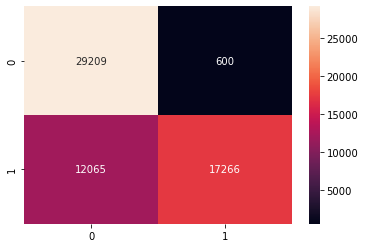

In [64]:
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


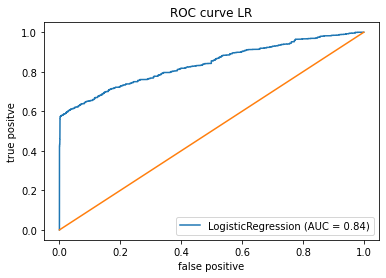

In [65]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LR')
plt.show()

In [66]:
df_test.head()

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Succes,Region_Auvergne,Region_Bourgogne,Region_Bretagne,Region_Centre,Region_Champagne-Ardenne,Region_Corse,Region_Franche-Comté,Region_Haute-Normandie,Region_Languedoc-Roussillon,Region_Midi-Pyrénées,Region_Picardie,Region_Poitou-Charentes,Region_Provence-Alpes-Côte d'Azur,Region_Rhône-Alpes,Departement_Aisne,Departement_Allier,Departement_Alpes-Maritimes,Departement_Ardèche,Departement_Aube,Departement_Aude,Departement_Bouches-du-Rhône,Departement_Charente,Departement_Charente-Maritime,Departement_Corse-du-Sud,Departement_Côte-d'Or,Departement_Côtes-d'Armor,Departement_Doubs,Departement_Drôme,Departement_Eure,Departement_Eure-et-Loir,Departement_Finistère,Departement_Gard,Departement_Gers,Departement_Gironde,Departement_Haute-Garonne,Departement_Hérault
0,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
y.iloc[:1,]

0    1
Name: Succes, dtype: int64

In [68]:
test1 = X.iloc[:1,]
test1 = scaler.transform(test1)

C:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [69]:
test1

array([[3.e+01, 2.e+00, 1.e+00, 2.e+00, 2.e+00, 1.e+00, 1.e+05, 1.e+03]])

In [70]:
exm_pred = lr.predict(test1)
print(exm_pred)

[1]


In [71]:
X_new = pd.DataFrame([70, 3, 1, 1, 2, 250000, 31000, "Occitanie", "Ariege"], columns = X.columns)
X_new

ValueError: Shape of passed values is (9, 1), indices imply (9, 8)

In [72]:
df_test.head(1)

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Succes,Region_Auvergne,Region_Bourgogne,Region_Bretagne,Region_Centre,Region_Champagne-Ardenne,Region_Corse,Region_Franche-Comté,Region_Haute-Normandie,Region_Languedoc-Roussillon,Region_Midi-Pyrénées,Region_Picardie,Region_Poitou-Charentes,Region_Provence-Alpes-Côte d'Azur,Region_Rhône-Alpes,Departement_Aisne,Departement_Allier,Departement_Alpes-Maritimes,Departement_Ardèche,Departement_Aube,Departement_Aude,Departement_Bouches-du-Rhône,Departement_Charente,Departement_Charente-Maritime,Departement_Corse-du-Sud,Departement_Côte-d'Or,Departement_Côtes-d'Armor,Departement_Doubs,Departement_Drôme,Departement_Eure,Departement_Eure-et-Loir,Departement_Finistère,Departement_Gard,Departement_Gers,Departement_Gironde,Departement_Haute-Garonne,Departement_Hérault
0,30,2,1,2,2,1,100000,1000,Bourg En Bresse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df_33.head()

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,Region,Succes
0,30,2,1,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
1,30,2,1,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
2,30,2,1,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
3,30,2,1,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1
4,30,2,1,2,2,1,100000,1000,Bourg En Bresse,Ain,Rhône-Alpes,1


In [74]:
df_33.columns

Index(['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
       'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal', 'Ville',
       'Departement', 'Region', 'Succes'],
      dtype='object')

In [75]:
# creation d'un profil a faire tester par notre modèle
#df_test = pd.get_dummies(df_33,columns = ['Region','Departement'], drop_first=True)


data = {'SurfaceMin':70, 
            'NombrePiecesEnum' : 3, 
            'NombreChambresEnum':1,
            'TypeMission': 1,
           'TypeBien': 2, 
            'TypeProjet': 1,
            'BudgetMaxEuro': 250000, 
             'CodePostal': 31000,
            'Departement': "Haute-Garonne",
            'Region':"Occitanie"}
    


#columns = X.columns

#X_new2 = pd.get_dummies(X_new[6:], drop_first=True)
#X_new.extend(X_new2)
#scaler

In [76]:
colonnes = ['SurfaceMin', 'NombrePiecesEnum', 'NombreChambresEnum', 'TypeMission',
           'TypeBien', 'TypeProjet', 'BudgetMaxEuro', 'CodePostal',
           'Departement', 'Region']


X_new = pd.DataFrame(data = [[70, 3, 1, 1, 2, 1, 250000, 31000, "Haute-Garonne","Occitanie"]], columns = colonnes )


In [77]:
X_new

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Departement,Region
0,70,3,1,1,2,1,250000,31000,Haute-Garonne,Occitanie


In [78]:
X_new2 = pd.Series(X_new2)

NameError: name 'X_new2' is not defined

In [79]:
X_new

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Departement,Region
0,70,3,1,1,2,1,250000,31000,Haute-Garonne,Occitanie


In [80]:
type(X_new2)

NameError: name 'X_new2' is not defined

In [81]:
X_new[7:]

,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Departement,Region


# knn

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

                  precision    recall  f1-score   support

  échec(Class 0)       1.00      1.00      1.00     29809
succès (Class 1)       1.00      1.00      1.00     29331

        accuracy                           1.00     59140
       macro avg       1.00      1.00      1.00     59140
    weighted avg       1.00      1.00      1.00     59140



<AxesSubplot:>

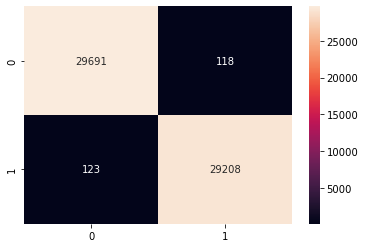

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn, target_names = ['échec(Class 0)','succès (Class 1)']))
cm = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

<AxesSubplot:>

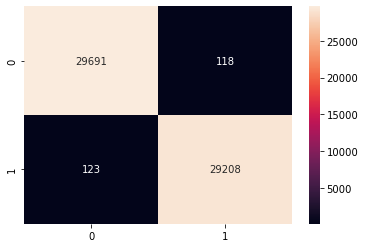

In [84]:
cm = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


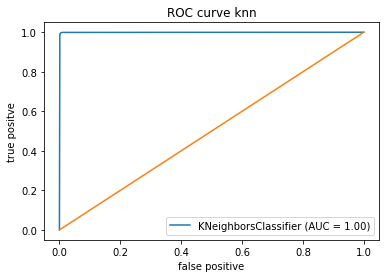

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve knn')
plt.show()

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from pprint import pprint
pprint("paramètre actuellement utiliés : \n")
pprint(rfc.get_params())
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_test)
pred_prob3 = rfc.predict_proba(X_test)

'paramètre actuellement utiliés : \n'
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# XGBoost Classifier

In [88]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic')
from pprint import pprint
pprint("paramètre actuellement utiliés : \n")
pprint(xgb.get_params())
xgb.fit(X_train, y_train,eval_metric = "logloss",verbose=True)
y_xgb = xgb.predict(X_test)
pred_prob4 = xgb.predict_proba(X_test)

C:\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


'paramètre actuellement utiliés : \n'
{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': True,
 'validate_parameters': None,
 'verbosity': None}


# naive_bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from pprint import pprint
#pprint("paramètre actuellement utiliés : \n")
#pprint(gnb.get_params())
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
y_gnb = gnb.predict(X_test)
pred_prob5 = gnb.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_gnb,target_names = ['échec(Class 0)','succès (Class 1)']))

'paramètre actuellement utiliés : \n'
{'priors': None, 'var_smoothing': 1e-09}
0.7858133243151844
                  precision    recall  f1-score   support

  échec(Class 0)       0.71      0.98      0.82     29809
succès (Class 1)       0.97      0.59      0.74     29331

        accuracy                           0.79     59140
       macro avg       0.84      0.79      0.78     59140
    weighted avg       0.84      0.79      0.78     59140



<AxesSubplot:>

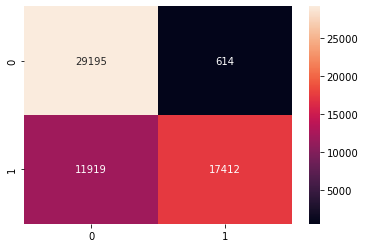

In [90]:
cm = confusion_matrix(y_test,gnb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# GradientBoostingClassifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
y_gbc = gbc.predict(X_test)
pred_prob6 = gbc.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_gbc,target_names = ['échec(Class 0)','succès (Class 1)']))

0.8836884229511893
                  precision    recall  f1-score   support

  échec(Class 0)       0.83      0.97      0.90     29809
succès (Class 1)       0.96      0.80      0.87     29331

        accuracy                           0.89     59140
       macro avg       0.90      0.88      0.88     59140
    weighted avg       0.90      0.89      0.88     59140



<AxesSubplot:>

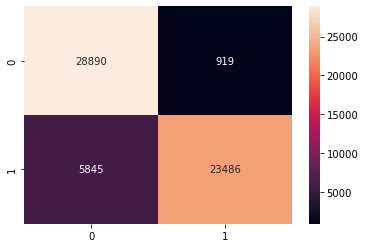

In [92]:
cm = confusion_matrix(y_test,gbc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# LGBMClassifier

In [ ]:
#!pip install lightgbm

In [93]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [94]:
y_clf = clf.predict(X_test)
pred_prob7 = clf.predict_proba(X_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf,target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.97      0.99      0.98     29809
succès (Class 1)       0.99      0.97      0.98     29331

        accuracy                           0.98     59140
       macro avg       0.98      0.98      0.98     59140
    weighted avg       0.98      0.98      0.98     59140



<AxesSubplot:>

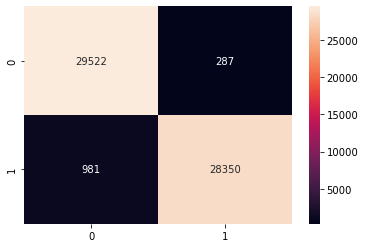

In [96]:
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# CatBoostClassifier

In [97]:
#!pip install catboost

In [98]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
cat_features = [0, 1]
# Fit model
cat.fit(X_train, y_train)
# Get predicted classes
preds_class = cat.predict(X_test)
# Get predicted probabilities for each class
pred_prob8 = cat.predict_proba(X_test)

0:	learn: 0.4607156	total: 150ms	remaining: 150ms
1:	learn: 0.4318647	total: 155ms	remaining: 0us


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_class,target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.71      0.94      0.81     29809
succès (Class 1)       0.91      0.62      0.73     29331

        accuracy                           0.78     59140
       macro avg       0.81      0.78      0.77     59140
    weighted avg       0.81      0.78      0.77     59140



<AxesSubplot:>

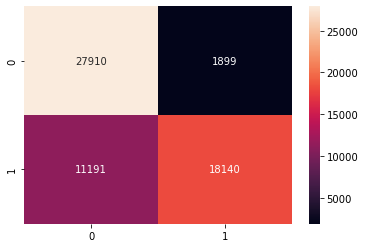

In [100]:
cm = confusion_matrix(y_test,cat.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [101]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [102]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])
auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])

#print(auc_score4)
print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6, auc_score7, auc_score8)

0.8403135147327854 0.9986663411274275 0.9999364643314164 0.9994429697743825 0.8246102163477069 0.9589526818637202 0.9982079192293397 0.8398712572530537


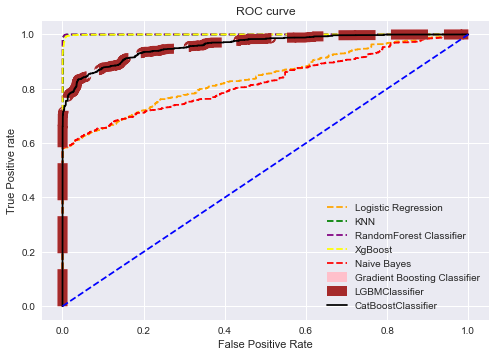

In [103]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle = '--', color = 'purple', label = "RandomForest Classifier")
plt.plot(fpr4, tpr4, linestyle = '--', color = 'yellow', label = "XgBoost")
plt.plot(fpr5, tpr5, linestyle = '--', color = 'red', label = "Naive Bayes")
plt.plot(fpr6, tpr6, linestyle = '--',linewidth=10, color = 'pink', label = "Gradient Boosting Classifier")
plt.plot(fpr6, tpr6, linestyle = '--',linewidth=10, color = 'brown', label = "LGBMClassifier")
plt.plot(fpr6, tpr6, linestyle = '-', color = 'black', label = "CatBoostClassifier")


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import accuracy_score
print("Correct prediction: ", accuracy_score(y_test, knn.predict(X_test), normalize = False))
print("Total Prediction : ",X.shape[0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr,target_names = ['Echec(Class 0)','Succès (Class 1)']))
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn, target_names = ['échec(Class 0)','succès (Class 1)']))
cm = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rfc, target_names = ['échec(Class 0)','succès (Class 1)']))
cm = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_xgb, target_names = ['échec(Class 0)','succès (Class 1)']))
cm = confusion_matrix(y_test, xgb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# Wisdom of the crown

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier
# hard 
# soft = meilleur quand model bien équilibré


In [ ]:
model_1 = SGDClassifier(random_state = 0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([("SGD", model_1),
                            ('Tree', model_2),
                            ("Knn", model_3)],
                           voting = "hard" )

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
model = BaggingClassifier(base_estimator = KNeighborsClassifier(),
                         n_estimators = 100)